In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{\mathbb{E}}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Systems of Linear Equations
===========================

In this chapter, you’ll be able to use what you learned about vectors
(Section 5.1.1 and
Section 5) and matrices
(Section 6), and linear
combinations (Section 7.2). This
will allow you to convert data into systems of linear equations. At the
end of this chapter, you’ll see how you can use systems of equations and
linear algebra to solve a linear regression problem
(Section 8.4).

Linear equations are formalizations of the relationship between
variables. Take the example of a linear relationship between two
variables $x$ and $y$ defined by the following equation:

$$
y = 2x + 1
$$

You can represent this relationship in a Cartesian plane:

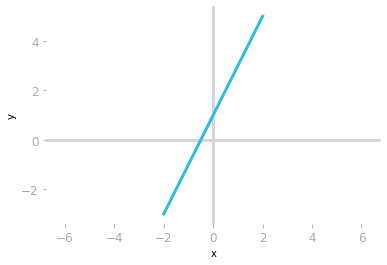

In [2]:
# create x and y vectors
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
plt.plot(x, y)
# [...] Add axes and styles
, zorder=0
# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_one_equation_line" alt="Figure 134: Plot of the equation y=2x+1." />
Figure 134: Plot of the equation <span class="math inline"><em>y</em> = 2<em>x</em> + 1</span>.

Remember that each point on the line corresponds to a solution of this
equation: if you replace $x$ and $y$ with the coordinates of a point on
the line in this equation, the equality is satisfied. This means that
there is an infinite number of solutions (every point in the line).

It is also possible to consider more than one linear equation using the
same variables: this is a *system of equations*.

8.1 System of linear equations
------------------------------

A system of equations is a set of equations describing the relationship
between variables. For instance, let’s consider the following example:

$$
\begin{cases}
y &= 2x + 1\\\\
y &= -0.5x + 3
\end{cases}
$$

You have two linear equations and they both characterize the
relationship between the variables $x$ and $y$. This is a system with
two equations and two variables (also called *unknowns* in this
context).

You can consider systems of linear equations (each row of the system) as
multiple equations, each corresponding to a line. This is called the
*row picture*.

You can also consider the system as different columns corresponding to
coefficients scaling the variables. This is called the *column picture*.
Let’s see more details about these two pictures.

### 8.1.1 Row Picture

With the row picture, each row of the system corresponds to an equation.
In the previous example, there are two equations describing the
relationship between two variables $x$ and $y$.

#### Graphical Representation of the Row Picture

Let’s represent the two equations graphically:

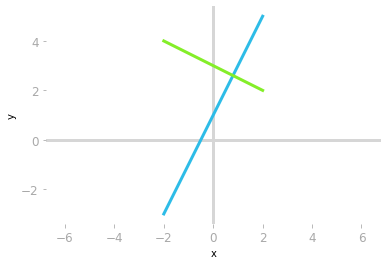

In [3]:
# create x and y vectors
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
y1 = -0.5 * x + 3
plt.plot(x, y)
plt.plot(x, y1)
# [...] 

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_two_equation_lines" alt="Figure 135: Representation of the two equations from our system." />
Figure 135: Representation of the two equations from our system.

Having more than one equation means that the values of $x$ and $y$ must
satisfy more equations. Remember that the $x$ and $y$ from the first
equation are the same as the $x$ and $y$ from the second equation.

All points on the blue line satisfy the first equation and all points on
the green line satisfy the second equation. This means that only the
point on both lines satisfies the two equations. The system of equations
is solved when $x$ and $y$ take the values corresponding to the
coordinates of the line intersection.

In this example, this point has an $x$-coordinate of 0.8 and a
$y$-coordinate of 2.6. If you replace these values in the system of
equations, you have:

$$
\begin{cases}
2.6 &= 2 \cdot 0.8 + 1\\\\
2.6 &= (-0.5) \cdot 0.8 + 3
\end{cases}
$$

This is a geometrical way of solving the system of equations. The linear
system is solved for $x=0.8$ and $y=2.6$.

### 8.1.2 Column Picture

Viewing the system as columns is called the column picture: you consider
your system as unknown values ($x$ and $y$) that scale vectors.

To better see this, let’s rearrange the equations to have the variables
on one side and the constants on the other side. For the first, you
have:

$$
\begin{aligned}
y = 2x + 1 \\\\
y - 2x = 1
\end{aligned}
$$

and for the second:

$$
\begin{aligned}
y = -0.5x + 3 \\\\
y + 0.5x = 3
\end{aligned}
$$

You can now write the system as:

$$
\begin{cases}
y - 2x &= 1\\\\
y + 0.5x &= 3
\end{cases}
$$

You can now look at Figure [136](#fig:ch09_system_column_picture) to see
how to convert the two equations into a single *vector equation*.

<img src="images/ch09_system_column_picture.png" id="fig:ch09_system_column_picture" width="500" alt="Figure 136: Considering the system of equations as column vectors scaled by the variables x and y." />
Figure 136: Considering the system of equations as column vectors scaled by the variables <span class="math inline"><em>x</em></span> and <span class="math inline"><em>y</em></span>.

On the right of Figure [136](#fig:ch09_system_column_picture), you have
the vector equation. There are two column vectors on the left-hand side
and one column vector on the right-hand side. As you saw in
Section 7.2, this corresponds to
a linear combination of the following vectors:

$$
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix}
$$

With the column picture, you replace multiple equations with a single
vector equation. In this perspective, you want to find the linear
combination of the left-hand side vectors that gives you the right-hand
side vector.

The solution in the column picture is the same. Row and column pictures
are just two different ways to consider the system of equations:

$$
\begin{aligned}
2.6 \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} +
0.8 \begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix}
&=\begin{bmatrix}
    2.6 \cdot 1 \\\\
    2.6 \cdot 1
\end{bmatrix} +
\begin{bmatrix}
    0.8 \cdot (-2) \\\\
    0.8 \cdot 0.5
\end{bmatrix} \\\\
&=\begin{bmatrix}
    2.6 \\\\
    2.6
\end{bmatrix} +
\begin{bmatrix}
    -1.6 \\\\
    0.4
\end{bmatrix} \\\\
&=\begin{bmatrix}
    2.6 - 1.6 \\\\
    2.6 + 0.4
\end{bmatrix}=\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
\end{aligned}
$$

It works: you get the right-hand side vector if you use the solution you
found geometrically.

#### Graphical Representation of the Column Picture

Let’s represent the system of equations considering it as a linear
combination of vectors. Let’s take again the previous example:

$$
y \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} +
x \begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix} =
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

Figure [137](#fig:ch09_column_picture_linear_combination) shows the
graphical representation of the two vectors from the left-hand side (the
vectors you want to combine, in blue and red in the picture) and the
vector from the right-hand side of the equation (the vector you want to
obtain from the linear combination, in green in the picture).

<figure>
<img src="images/ch09_column_picture_linear_combination.png" id="fig:ch09_column_picture_linear_combination" width="300" alt="Figure 137: Linear combination of the vectors scaled by x and y gives the right-hand vector." /><figcaption aria-hidden="true">Figure 137: Linear combination of the vectors scaled by <span class="math inline"><em>x</em></span> and <span class="math inline"><em>y</em></span> gives the right-hand vector.</figcaption>
</figure>

You can see in Figure [137](#fig:ch09_column_picture_linear_combination)
that you can reach the right-hand side vector by combining the left-hand
side vectors. If you scale the vectors with the values 2.6 and 0.8, the
linear combination gets you to the vector on the right-hand side of the
equation.

### 8.1.3 Number of Solutions

In some linear systems, there is not a unique solution. Actually, linear
systems of equations can have either:

-   No solution.
-   One solution.
-   An infinite number of solutions.

Let’s consider these three possibilities (with the row picture and the
column picture) to see how it is impossible for a linear system to have
more than one solution and less than an infinite number of solutions.

#### Example 1. No Solution

Let’s take the following linear system of equations, still with two
equations and two variables:

$$
\begin{cases}
y &= 2x + 1\\\\
y &= 2x + 3
\end{cases}
$$

We’ll start by representing these equations:

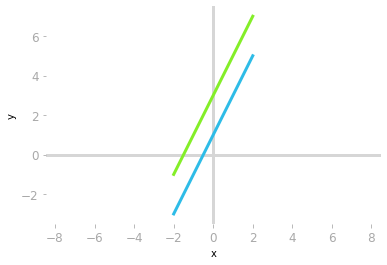

In [4]:
# create x and y vectors
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
y1 = 2 * x + 3

plt.plot(x, y)
plt.plot(x, y1)
# [...] Add axes, styles...

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_parallel_equation_lines" alt="Figure 138: Parallel equation lines." />
Figure 138: Parallel equation lines.

As you can see in Figure [138](#fig:ch09_parallel_equation_lines), there
is no point that is on both the blue and green lines. This means that
this system of equations has no solution.

You can also understand graphically why there is no solution through the
column picture. Let’s write the system of equations as follows:

$$
\begin{cases}
y - 2x &= 1\\\\
y - 2x &= 3
\end{cases}
$$

Writing it as a linear combination of column vectors, you have:

$$
y \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} +
x \begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

<figure>
<img src="images/ch09_column_picture_no_solution.png" id="fig:ch09_column_picture_no_solution" width="150" alt="Figure 139: Column picture of a linear system with no solution." /><figcaption aria-hidden="true">Figure 139: Column picture of a linear system with no solution.</figcaption>
</figure>

Figure [139](#fig:ch09_column_picture_no_solution) shows the column
vectors of the system. You can see that it is impossible to reach the
endpoint of the green vector by combining the blue and the red vectors.
The reason is that these vectors are linearly dependent (more details in
Section 7.4). The vector to reach
is outside of the span of the vectors you combine.

#### Example 2. Infinite Number of Solutions

You can encounter another situation where the system has an infinite
number of solutions. Let’s consider the following system:

$$
\begin{cases}
y &= 2x + 1\\\\
2y &= 4x + 2
\end{cases}
$$

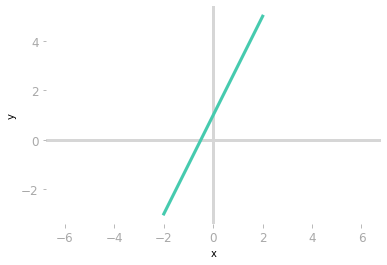

In [5]:
# create x and y vectors
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
y1 = (4 * x + 2) / 2

plt.plot(x, y)
plt.plot(x, y1, alpha=0.3)
# [...] Add axes, styles...

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_overlapping_equation_lines" alt="Figure 140: The equation lines are overlapping." />
Figure 140: The equation lines are overlapping.

Since the equations are the same, an infinite number of points are on
both lines and thus, there is an infinite number of solutions for this
system of linear equations. This is for instance similar to the case
with a single equation and two variables.

From the column picture perspective, you have:

$$
\begin{cases}
y - 2x &= 1\\\\
2y - 4x &= 2
\end{cases}
$$

and with the vector notation:

$$
y \begin{bmatrix}
    1 \\\\
    2
\end{bmatrix} +
x \begin{bmatrix}
    2 \\\\
    4
\end{bmatrix} =
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

<figure>
<img src="images/ch09_column_picture_infinite_solutions.png" id="fig:ch09_column_picture_infinite_solutions" width="150" alt="Figure 141: Column picture of a linear system with an infinite number of solutions." /><figcaption aria-hidden="true">Figure 141: Column picture of a linear system with an infinite number of solutions.</figcaption>
</figure>

Figure [141](#fig:ch09_column_picture_infinite_solutions) shows the
corresponding vectors graphically represented. You can see that there is
an infinite number of ways to reach the endpoint of the green vector
with combinations of the blue and red vectors.

Since both vectors go in the same direction, there is an infinite number
of linear combinations allowing you to reach the right-hand side vector.

#### Summary

To summarize, you can have three possible situations, shown with two
equations and two variables in Figure
[142](#fig:ch09_solutions_systems_equations).

<figure>
<img src="images/ch09_solutions_systems_equations.png" id="fig:ch09_solutions_systems_equations" width="500" alt="Figure 142: Summary of the three situations for two equations and two variables." /><figcaption aria-hidden="true">Figure 142: Summary of the three situations for two equations and two variables.</figcaption>
</figure>

It is impossible to have two lines crossing more than once and less than
an infinite number of times.

The principle holds for more dimensions. For instance, with three planes
in $\setR^3$, at least two can be parallel (no solution), the three can
intersect (one solution), or the three can be superposed (infinite
number of solutions).

### 8.1.4 Representation of Linear Equations With Matrices

Now that you can write vector equations using the column picture, you
can go further and use a matrix to store the column vectors.

Let’s take again the following linear system:

$$
y \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} + x \begin{bmatrix}
    -2 \\\\
    0.5
\end{bmatrix} = \begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

Remember from Section 7.2.1.1 that
you can write linear combinations as a matrix-vector product. The matrix
corresponds to the two column vectors from the left-hand side
concatenated:

$$
\begin{bmatrix}
    1 & -2 \\\\
    1 & 0.5
\end{bmatrix}
$$

And the vector corresponds to the coefficients weighting the column
vectors of the matrix (here, $x$ and $y$):

$$
\begin{bmatrix}
    y \\\\
    x
\end{bmatrix}
$$

Your linear system becomes the following matrix equation:

$$
\begin{bmatrix}
    1 & -2 \\\\
    1 & 0.5
\end{bmatrix}
\begin{bmatrix}
    y \\\\
    x
\end{bmatrix}
= \begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

#### Notation

This leads to the following notation widely used to write linear
systems:

$$
\mA \vx = \vb
$$

with $\mA$ the matrix containing the column vectors, $\vx$ the vector of
coefficients and $\vb$ the resulting vector, that we’ll call the *target
vector*. It allows you to go from calculus, where equations are
considered separately, to linear algebra, where every piece of the
linear system are represented as vectors and matrices. This abstraction
is very powerful and brings vector space theory to solve systems of
linear equations.

With the column picture, you want to find the coefficients of the linear
combination of the column vectors on the left-hand side of the equation.
The solution exists only if the target vector is within their span.

8.2 System Shape
----------------

Now that you can represent linear systems of equations as matrix
equations, you’ll be able to leverage what you learn about matrices in
this context.

The properties of the matrix $\mA$ in the system $\mA \vx=\vb$ gives
some information about the system and the number of solutions depends of
the shape of $\mA$.

### 8.2.1 Overdetermined Systems of Equations

If $\mA$ has more rows than columns, the system has more equations than
unknowns. It is called an *overdetermined system*. The consequence is
that there is often no solution to such systems.

To see why, let’s consider the case of a matrix $\mA$ of shape (3, 2).
With the row picture, you have three equations and two unknowns. Figure
[143](#fig:ch09_overdetermined_system) shows an example of this system.
There is no solution because the three lines will generally not
intersect in a common point.

<img src="images/ch09_overdetermined_system.png" id="fig:ch09_overdetermined_system" width="200" alt="Figure 143: An overdetermined system with two unknowns and three equations. There is usually no solution." />
Figure 143: An overdetermined system with two unknowns and three equations. There is usually no solution.

Let’s take another example: a matrix $\mA$ with a shape (4, 3). The row
picture, represented in Figure
[144](#fig:ch09_overdetermined_system_planes_intersections) shows four
planes in three dimensions (the planes were created with Geogebra. You
can use the following link to move around the planes and get more
insights: https://www.geogebra.org/3d/pxvnabbx) .

<figure>
<img src="images/ch09_overdetermined_system_planes_intersections.png" id="fig:ch09_overdetermined_system_planes_intersections" width="500" alt="Figure 144: Three unknowns and four equations. There is usually no solution." /><figcaption aria-hidden="true">Figure 144: Three unknowns and four equations. There is usually no solution.</figcaption>
</figure>

You can see by looking at the plane intersections in Figure
[144](#fig:ch09_overdetermined_system_planes_intersections) that there
is no point at the intersection of all planes. This means that there is
no solution in this system of linear equations.

The principle is the same for a larger number of dimensions.

### 8.2.2 Underdetermined Systems of Equations

When the system has fewer equations than unknowns ($\mA$ has less rows
than columns) it is called *underdetermined*. In this case, there is
often an infinite number of solutions. In some particular cases, an
underdetermined system can have no solution.

Let’s take the following system as an example:

$$
y = -3x - 4
$$

There is a single equation and two unknowns, so the system is
underdetermined. Since there is only one equation, all points on the
line is a solution: there is an infinite number of points on the line,
so there is an infinite number of solutions.

Let’s take another example:

$$
\begin{cases}
z &= -2x + 3y + 5\\\\
z &= 4x + y + 2
\end{cases}
$$

In this system, there are two equations and three unknowns: it is
underdetermined.

<img src="images/ch09_underdetermined_system_planes.png" id="fig:ch09_underdetermined_system_planes" width="200" alt="Figure 145: Two equations and three unknowns." />
Figure 145: Two equations and three unknowns.

Figure [145](#fig:ch09_underdetermined_system_planes) shows the
graphical representation of the two planes in a three-dimensional space
(you can also play with it here: https://www.geogebra.org/3d/dtsjjvsf.)
. You can see that the intersection of the two planes is a line. This
means that all points on this line is a solution to the system of
equations: there is an infinite number of solutions.

Let’s see another example showing a particular case of an
underdetermined system of equations:

$$
\begin{cases}
z &= x + y\\\\
z &= x + y + 10
\end{cases}
$$

<figure>
<img src="images/ch09_underdetermined_system_planes_no_solution.png" id="fig:ch09_underdetermined_system_planes_no_solution" width="200" alt="Figure 146: Two equations and three unknowns with no solution: planes are parallel." /><figcaption aria-hidden="true">Figure 146: Two equations and three unknowns with no solution: planes are parallel.</figcaption>
</figure>

Figure [146](#fig:ch09_underdetermined_system_planes_no_solution) shows
a representation of the planes corresponding to these equations (you can
play with it here: https://www.geogebra.org/3d/nmdmvewt.) . You can see
that the two planes are parallel: there is no point at the intersection
of these two planes, and thus, the system has no solution.

Even if overdetermined systems has often no solution and underdetermined
systems have an infinite number of solutions, there are special
situations where this is not the case.

8.3 Projections
---------------

You saw how to express a system of linear equations with the form
$\mA \vx = \vb$. However, how can you find a solution or approximate a
solution when none exists? The matrix form of the system of equations
sometimes allows you to express the solution using the inverse of the
matrix $\mA$.

You’ll see that there is a solution if the target vector is in the
column space of $\mA$ (more details about column space in
Section 7.3.2). If it is not
the case, you need to project the target vector to the column space to
approximate a solution.

You’ll learn how to do these projections and it will lead you to
understand a major equation in machine learning and data science: the
normal equation.

### 8.3.1 Solving Systems of Equations

Finding the inverse of a matrix allows you to solve systems of linear
equations. As you learned in
Section 6.4.4, the multiplication
of a matrix with its inverse gives the identity matrix
($\mA \mI = \mA$). Since a matrix multiplied by its inverse gives you
the identity matrix ($\mA^{-1} \mA = \mI$), you can use the inverse to
isolate an element in a matrix equation. If the matrix $\mA$ has an
inverse, you can multiply each side of the linear system by $\mA^{-1}$:

$$
\begin{aligned}
\mA \vx &= \vb \\\\
\mA^{-1}\mA \vx &= \mA^{-1}\vb \\\\
\vx &= \mA^{-1}\vb
\end{aligned}
$$

This is like with standard equations where you multiply or divide each
side to isolate the variable you’re interested in. However, be careful
and remember that, with matrices and vectors, the order of the
multiplication matters.

In the matrix equation, you know $\mA$ and $\vb$ and you want to find
$\vx$. If $\mA$ has an inverse: the equation is solved.

The matrix $\mA$ gives information about the system of equations. For
instance, if $\mA$ is invertible (its inverse exists), you know that the
set of equations has one and only one solution. In addition, as you
learned in Section 7.6.3, a square
matrix $\mA$ is singular if and only if its determinant is equal to
zero, so if $\mA$ has a non-zero determinant, the system of linear
equations has a single solution.

### 8.3.2 Projections to Approximate Unsolvable Systems

A linear system $\mA \vx=\vb$ is solvable only if the target vector
$\vb$ is included in the column space of $\mA$ (the space corresponding
to all possible linear combinations of the column vectors of the matrix,
as you saw in Section 7.3). Solving the
system $\mA \vx=\vb$ means finding a linear combination of the columns
of $\mA$ equal to $\vb$, the solution being $\vx$.

However, some sets of linear equations have no solution. This is often
the case with overdetermined system of equations (as you saw in
Section 8.2), where the matrix $\mA$
has more rows than column ($m>n$).

Let’s take an example with the following set of equations:

$$
\begin{cases}
y &= 2x + 1 \\\\
y &= x - 0.5 \\\\
y &= -2x
\end{cases}
$$

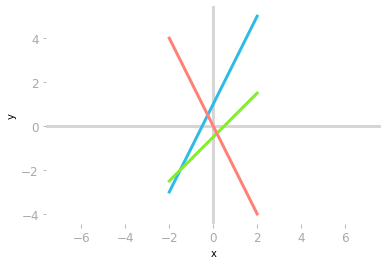

In [6]:
# create x and y vectors
x = np.linspace(-2, 2, 100)
y = 2 * x + 1
y1 =  x - 0.5
y2 = -2 * x

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_unsolvable_system" alt="Figure 147: Row picture of a unsolvable system of equations." />
Figure 147: Row picture of a unsolvable system of equations.

You can see in Figure [147](#fig:ch09_unsolvable_system) that the three
lines do not intersect in a common point. Writing the system with all
variables on the left-hand side, you have:

$$
\begin{cases}
-2x + y &= 1 \\\\
-x + y &= 0.5 \\\\
2x + y &= 0
\end{cases}
$$

The matrix form is $\mA \vx = \vb$, with the following $\mA$, $\vx$ and
$\vb$:

$$
\begin{aligned}
\mA \vx &= \vb \\\\
\begin{bmatrix}
    -2 & 1 \\\\
    -1 & 1 \\\\
    2 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y
\end{bmatrix}
&= \begin{bmatrix}
    1 \\\\
    0.5 \\\\
    0
\end{bmatrix}
\end{aligned}
$$

Note that we used the letter $x$ and $y$ because we represented the
equations in a Cartesian plane: the vector $\vx$ contains both values
$x$ and $y$.

Let’s represent the column vectors of $\mA$ as geometric vectors. They
are:

$$
\begin{bmatrix}
    -2 \\\\
    -1 \\\\
    2
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    1 \\\\
    1 \\\\
    1
\end{bmatrix}
$$

We’ll also visualize their span: the space containing all points
reachable by linear combination of these two vectors. This space is the
column space of $\mA$.

Finally, let’s represent the vector $\vb$ corresponding to the position
you want to reach, which is defined as:

$$
\begin{bmatrix}
    1 \\\\
    0.5 \\\\
    0
\end{bmatrix}
$$

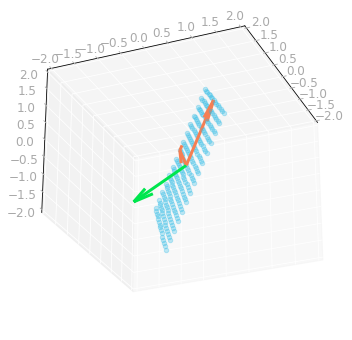

In [7]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([-2, -1, 2])
v2 = np.array([1, 1, 1])
v3 = np.array([0.3, -1, -1])

x = np.linspace(-1, 1, 15)
y = np.linspace(-1, 1, 15)

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        z = x[i] * v1 + y[j] * v2
        ax.scatter(z[0], z[1], z[2], c='#2EBCE7', alpha=0.3)
    
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color="#F57F53")
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color="#F57F53")
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color="#00E64E")

ax.view_init(elev=-27, azim=23)

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
plt.show()


<img src="images/blank.png" id="fig:ch09_solution_outside_column_space" alt="Figure 148: The target vector (green) is outside of the span of the column space (blue)." />
Figure 148: The target vector (green) is outside of the span of the column space (blue).

You can see in Figure [148](#fig:ch09_solution_outside_column_space)
that the target vector you want to reach (in green) is outside of the
column space (the blue plane, corresponding to the span of the column
vectors of $\mA$ represented in red). This shows that you can’t reach
the green vector by linear combinations of the red vectors.

However, you might want to approximate a solution when a true solution
doesn’t exist. A good candidate is the nearest point to the target
vector which is into the plane. This is the green vector projected onto
the column space of $\mA$.

Let’s see how projection works by looking at how you can project onto a
line, and then onto a plane.

### 8.3.3 Projections Onto a Line

Let’s see how to project a vector onto a line.

<img src="images/ch09_projection_line.png" id="fig:ch09_projection_line" width="150" alt="Figure 149: Projection onto a line: the vector \vp is the projection of the vector \vb onto the line passing by the vector \va." />
Figure 149: Projection onto a line: the vector <span class="math inline">$\vp$</span> is the projection of the vector <span class="math inline">$\vb$</span> onto the line passing by the vector <span class="math inline">$\va$</span>.

Figure [149](#fig:ch09_projection_line) shows that the projection line
is perpendicular to the vector $\va$ onto which you project. This
projection is called *orthogonal projection*. Let’s see how to find the
vector $\vp$.

First, you can see that the projection vector going from $\vb$ to the
line passing by $\va$ (dotted gray line in Figure
[149](#fig:ch09_projection_line)) is defined as $\vb - \vp$ (the gray
solid vector in the figure; the starting point of the vector doesn’t
matter).

Furthermore, the vector $\vp$ is a scaled version of the vector $\va$.
Mathematically, you can write:

$$
\vp = \hat{x}\va
$$

with $\hat{x}$ (pronounced “x hat”) the unknown value scaling the vector
$\va$ to reach the projection. You thus want to find $\hat{x}$ from
$\va$ and $\vb$. Since the vectors $\va$ and $\vb - \vp$ are orthogonal,
you have:

$$
\va \cdot (\vb - \vp) = 0
$$

Replacing $\vp$, you have:

$$
\begin{aligned}
\va \cdot (\vb - \hat{x}\va) &= 0 \\\\
\va \cdot \vb - \va \cdot \hat{x}\va &= 0 \\\\
-\va \cdot \hat{x}\va &= - \va \cdot \vb \\\\
\va \cdot \hat{x}\va &= \va \cdot \vb \\\\
\hat{x} &= \frac{\va \cdot \vb}{\va \cdot \va}
\end{aligned}
$$

You have a way to calculate $\hat{x}$. If you use this value to rescale
the vector $\va$, you’ll get the projection vector $\vp$. So, you can
write:

$$
\vp = \hat{x}\va = \frac{\va \cdot \vb}{\va \cdot \va}\va
$$

This formula allows you to calculate the projection of a vector onto
another.

You can find more details about the projection onto a line in the
introduction to linear algebra from Gilbert Strang (see Chapter 4.2,
p. 207, in Strang, Gilbert, et al. Introduction to linear algebra, 5th
Edition. Wellesley, MA: Wellesley-Cambridge Press, 2016.) .

##### Example

Let’s have the vector

$$
\va = \begin{bmatrix}
    3 \\\\
    1
\end{bmatrix}
$$

and

$$
\vb = \begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

You’ll project the vector $\vb$ onto the vector $\va$. Plotting these
vectors you have:

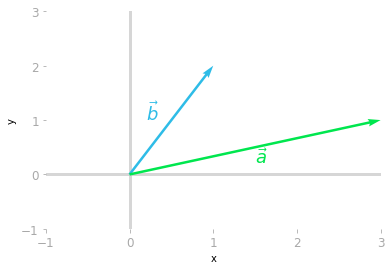

In [8]:

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.quiver(0, 0, 1, 2, color="#2EBCE7", angles='xy', scale_units='xy', scale=1)
plt.text(0.2, 1, r'$\vec{b}$', color="#2EBCE7", size=18)

ax.quiver(0, 0, 3, 1, color="#00E64E", angles='xy', scale_units='xy', scale=1)
plt.text(1.5, 0.2, r'$\vec{a}$', color="#00E64E", size=18)
# [...] Add axes etc.

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_two_vectors_u_v" alt="Figure 150: Representation of the vectors \va and \vb." />
Figure 150: Representation of the vectors <span class="math inline">$\va$</span> and <span class="math inline">$\vb$</span>.

The projection is
$p = \hat{x}\va = \frac{\va \cdot \vb}{\va \cdot \va}\va$, so you have:

$$
\begin{aligned}
\frac{\va \cdot \vb}{\va \cdot \va}\va &=
\frac{\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \cdot
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}}{\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \cdot
\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix}}
\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \\\\
&=
\frac{5}{10}
\begin{bmatrix}
    3 \\\\
    1
\end{bmatrix} \\\\
&=
\begin{bmatrix}
    1.5 \\\\
    0.5
\end{bmatrix}
\end{aligned}
$$

Let’s plot the projection.

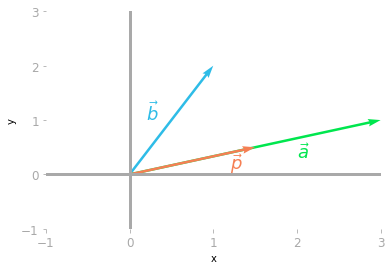

In [9]:

# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.quiver(0, 0, 1, 2, color="#2EBCE7", angles='xy', scale_units='xy', scale=1)
plt.text(0.2, 1, r'$\vec{b}$', color="#2EBCE7", size=18)

ax.quiver(0, 0, 3, 1, color="#00E64E", angles='xy', scale_units='xy', scale=1)
plt.text(2, 0.3, r'$\vec{a}$', color="#00E64E", size=18)

ax.quiver(0, 0, 1.5, 0.5, color="#F57F53", angles='xy', scale_units='xy', scale=1)
plt.text(1.2, 0.1, r'$\vec{p}$', color="#F57F53", size=18)
# [...] Add axes etc.

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_projection_vector" alt="Figure 151: The vector \vp is the projection of the vector \vb onto the vector \va." />
Figure 151: The vector <span class="math inline">$\vp$</span> is the projection of the vector <span class="math inline">$\vb$</span> onto the vector <span class="math inline">$\va$</span>.

It works: you can see in Figure [151](#fig:ch09_projection_vector) that
the vector $\vp$ is the projection of the vector $\vb$ onto the line
corresponding to the vector $\va$.

### 8.3.4 Projections Onto a Plane

To approximate a solution for a system of equations, you can calculate
the projection $\vp$ of the vector $\vb$ onto the plane corresponding to
the column space of the matrix $\mA$. You then solve the new equation
$\mA \hat{\vx}=\vp$ which has a solution.

<img src="images/ch09_projection_in_column_space.png" id="fig:ch09_projection_in_column_space" width="200" alt="Figure 152: The projection vector \vp is in the column space." />
Figure 152: The projection vector <span class="math inline">$\vp$</span> is in the column space.

The example in Figure [152](#fig:ch09_projection_in_column_space) shows
that you can reach the projection (the purple dot) with linear
combination of the column vectors (in red).

Let’s start from the vector $\vp$. Mathematically, it is a linear
combination of the column vectors of $\mA$:

$$
\vp = \hat{x}_1 \va_1 + \cdots + \hat{x}_n \va_n = \mA\hat{\vx}
$$

with $n$ being the number of columns of $\mA$, $a_1$ the first column
vector, $a_n$ the $n$th column vector, $\hat{x}_1$ the value scaling the
first column vector, and $\hat{x}_n$ the value scaling the $n$th column
vector.

Calculating the projection onto a plane is very similar to the
projection onto a line. You also want to find $\hat{\vx}$ (which is a
vector of weights instead of a scalar) such as the vector $\vp$ is the
closest vector to $\vb$ belonging to the column space. As shown in
Figure [153](#fig:ch09_projection_b_column_space), the vector from $\vb$
to $\vp$ (in gray) is perpendicular to the plane.

<figure>
<img src="images/ch09_projection_b_column_space.png" id="fig:ch09_projection_b_column_space" width="300" alt="Figure 153: Projection of the vector \vb onto the column space." /><figcaption aria-hidden="true">Figure 153: Projection of the vector <span class="math inline">$\vb$</span> onto the column space.</figcaption>
</figure>

This means that the dot product between this line and the plane is zero:
$\vb-\vp$ is perpendicular to every vectors $\va_1$ to $\va_n$:

$$
\begin{cases}
\va_1 \cdot (\vb - \vp) &= 0 \\\\
&\vdots \\\\
\va_n \cdot (\vb - \vp) &= 0
\end{cases}
$$

The vectors $\va_1$ to $\va_n$ are the column vectors from $\mA$. You
can write the equations as matrix product (you need to transpose the
vectors $\va_1$ to $\va_n$ to have a working matrix product):

$$
\begin{bmatrix}
    \va_1^{\text{T}} \\\\
    \vdots \\\\
    \va_n^{\text{T}}
\end{bmatrix}
\begin{bmatrix}
    \vb - \vp
\end{bmatrix} =
\begin{bmatrix}
    0
\end{bmatrix}
$$

The matrix containing the vectors $\va_1$ to $\va_n$ can be written as:

$$
\begin{bmatrix}
    \va_1^{\text{T}} \\\\
    \vdots \\\\
    \va_n^{\text{T}}
\end{bmatrix} = \begin{bmatrix}
    \va_1 & \cdots & \va_n
\end{bmatrix}^{\text{T}} = \mA^{\text{T}}
$$

So you have:

$$
\mA^{\text{T}} (\vb-\vp) = 0
$$

and since $p=\mA \hat{\vx}$, you can replace and write:

$$
\begin{aligned}
\mA^{\text{T}} (\vb-\mA\hat{\vx}) &= 0 \\\\
\mA^{\text{T}}\vb - \mA^{\text{T}}\mA\hat{\vx} &= 0
\end{aligned}
$$

This leads to the famous equation called the *normal equation*:

$$
\mA^{\text{T}}\mA\hat{\vx} = \mA^{\text{T}}\vb
$$

The advantage of this equation in comparison to $\mA \vx = \vb$ is that,
if the column vectors of the matrix $\mA$ are independent (see
Section 7.4), then
$\mA^{\text{T}}\mA$ is invertible. Thus, you can get $\hat{\vx}$ by
multiplying both sides with the inverse of $\mA^{\text{T}}\mA$: this
leads to cancel $\mA^{\text{T}}\mA$, allowing you to find $\hat{\vx}$:

$$
\begin{aligned}
\mA^{\text{T}}\mA\hat{\vx} &= \mA^{\text{T}}\vb \\\\
(\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}\mA\hat{\vx} &= (\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}\vb \\\\
\hat{\vx} &= (\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}\vb
\end{aligned}
$$

You can use this method to approximate a solution when a system of
linear equations has no solution, which is the case for almost all
overdetermined systems.

You saw that understanding the column picture of systems of linear
equations allows you to write these systems under the matrix form. Then,
you saw that you can use projections to approximate a solution to
unsolvable systems.

In the next section, you’ll see that this is the core of *Least Squares
Approximation*.

8.4 Hands-on Project: Linear Regression Using Least Squares Approximation
-------------------------------------------------------------------------

You can use least square approximation to find a line fitting data
points. In this hands-on project, you’ll learn how to go from data to a
matrix equation, which will allow you to use linear algebra on your data
and approximate a solution for linear regression problems.

### 8.4.1 Linear Regression Using the Normal Equation

The normal equation is an equation used to find an analytical solution
for linear regression, as an alternative to gradient descent.

Let’s say that you have two-dimensional data on which you want to fit a
line. The goal is to find the parameters of this best-fitting line.
Let’s call the slope $\theta_0$ (pronounced “theta zero”), and the
$y$-intercept $\theta_1$ (pronounced “theta one”).

In this first part, you’ll take only a few data points to easily
understand how you can convert a data problem into a linear algebra
equation.

Take the following three two-dimensional data points:

-   A: (0, 0)
-   B: (1, 2)
-   C: (2, 1)

Let’s plot these data points. You have a $x$ vector with the values 0, 1
and 2, and a $y$-vector with the values 0, 2 and 0.

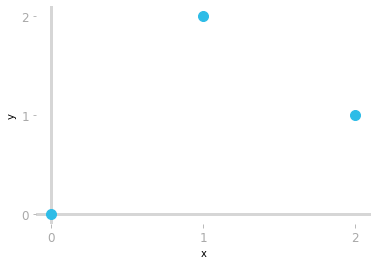

In [10]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])
plt.scatter(x, y)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_example_data_points" alt="Figure 154: Scatter plot of the example data points." />
Figure 154: Scatter plot of the example data points.

The goal is to find the line passing by these data points. The equation
of this line is:

$$
\vy=\theta_0 \vx + \theta_1
$$

The first step is to understand how this problem is related to systems
of linear equations.

Start with an hypothetical perfect solution: let’s say that there is a
line passing by all the data points (even if it is not possible). In
this case, the first data sample is on the line, meaning that the $x$
and $y$ values of this data point (which are 0 and 0) satisfy the
equation of your line $\vy=\theta_0 \vx + \theta_1 \vb$.

Replacing these values in the equation, you have:

$$
\begin{aligned}
0 &= \theta_0 \cdot 0 + \theta_1
\end{aligned}
$$

If you proceed identically with the second point, you have:

$$
2 = \theta_0 \cdot 1 + \theta_1
$$

and for the third point:

$$
1 = \theta_0 \cdot 2 + \theta_1
$$

With these equations, you have something that resembles a system of
equations. You can see that the unknowns $\theta_0$ and $\theta_1$ are
the parameters of the line. You can write the system as follows:

$$
\begin{cases}
0 &= 0 \cdot \theta_0 + \theta_1 \\\\
2 &= 1 \cdot \theta_0 + \theta_1 \\\\
1 &= 2 \cdot \theta_0 + \theta_1
\end{cases}
$$

Or under the matrix form:

$$
\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
= \begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$

Note that you need to add a column of 1 to represent the $y$-intercept.

Also, remember that, since there is no line passing by all the data
points, this system has no solution. You’ll need to find an
approximation.

Let’s keep the notation $\mA\vx = \vb$ with $A$ being the coefficients,
$\vx$ the unknowns ($\theta_0$ and $\theta_1$) and $\vb$ the solution:

You have

$$
\mA=\begin{bmatrix}
    0 & 1 \\\\
    1 & 1 \\\\
    2 & 1
\end{bmatrix}
$$

$$
\vx=\begin{bmatrix}
    \theta_0 \\\\
    \theta_1
\end{bmatrix}
$$

and

$$
\vb=\begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
$$

Let’s write $\mA$ and $\vb$ in Numpy:

In [11]:
A = np.array([
    [0, 1],
    [1, 1],
    [2, 1]
])

b = np.array([
    [0],
    [2],
    [1]
])

You can now use the normal equation to approximate a solution. As you
saw, you have

$$
\mA^{\text{T}}\mA\hat{\vx} = \mA^{\text{T}}\vb
$$

and thus:

$$
\hat{\vx} = (\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}\vb
$$

The columns of $\mA$ should be linearly independent, and thus
$(\mA^{\text{T}}\mA)^{-1}$ should exist.

The expression $(\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}$ is one way to
calculate what is called the *Moore-Penrose inverse*, or *pseudoinverse*
of the matrix $\mA$. The pseudoinverse is a generalization of the
inverse. It is denoted as $\mA^+$.

Another way to calculate the pseudoinverse is to calculate the Singular
Value Decomposition (SVD) of $\mA$ (that you’ll see in
Section 10), which is
the method used by the Numpy function `np.linalg.inv()` (as documented
here:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html\#numpy.linalg.pinv).

Let’s calculate $\hat{\vx}$:

$$
\begin{aligned}
\hat{\vx} &= (\mA^{\text{T}}\mA)^{-1}\mA^{\text{T}}\vb \\\\
\hat{\vx} &= 
\begin{bmatrix}
    0.5 & -0.5 \\\\
    -0.5 & 0.83
\end{bmatrix}
\begin{bmatrix}
    0 & 1 & 2 \\\\
    1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
    0 \\\\
    2 \\\\
    1
\end{bmatrix}
\end{aligned}
$$

In [12]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([[0.5],
       [0.5]])

This means that the best line has a slope of 0.5 and an intercept of
0.5. Let’s plot this line along with the data points:

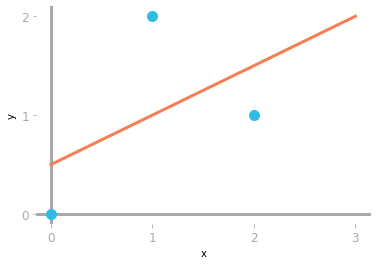

In [13]:
x = np.array([0, 1, 2])
y = np.array([0, 2, 1])

x1 = np.linspace(0, 3, 10)
y1 = 0.5 * x1 + 0.5

plt.scatter(x, y)
plt.plot(x1, y1, c="#F57F53")
# [...] Add axes, styles...

# Assure that ticks are displayed with a step equal to 1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#A9A9A9', zorder=0)
plt.axvline(0, c='#A9A9A9', zorder=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch09_least_square_approximation" alt="Figure 155: Regression line using the normal equation." />
Figure 155: Regression line using the normal equation.

The line in Figure [155](#fig:ch09_least_square_approximation) looks
good. You just implemented a linear regression using the normal
equation.

This shows an example of how linear algebra concepts as independence,
linear combinations, matrix product, column space, inverse of a matrix
etc., can be used to deeply understand a very common method: linear
regression using the normal equation.

### 8.4.2 Food Data

Now, that you saw how to go from data to matrix equations, let’s use
least squares approximation with real data: the CIQUAL dataset on food
composition (french Agency for Food, Environmental and Occupational
Health & Safety. ANSES-CIQUAL French food composition table version
2017. https://ciqual.anses.fr/) .

You’ll use the normal equation to model the relationship between the
amount of phosphorus and zinc in vegetables and legumes.

Let’s start by loading the data:

In [14]:
data = pd.read_csv("data/ciqual.csv", sep=";", encoding="latin9", na_values=['-', 'NaN'])

Let’s remove non-numeric characters in the data and convert the columns
to numeric type.

In [15]:
data = data.replace("< ", "", regex=True).replace('traces', 0)
cols = data.loc[:, data.columns != 'alim_ssssgrp_nom_eng'].columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

Now, you’ll select only part of the dataset you’ll need for the linear
regression. Then, remove the missing values:

In [16]:
food = ['vegetables. raw',
       'vegetables. cooked', 'vegetables. dried or dehydrated',
       'legumes. cooked', 'legumes. raw', 'legumes. dried',
       'fresh fruits']

data = data[['alim_ssssgrp_nom_eng', "Phosphorus (mg/100g)", "Zinc (mg/100g)"]]
data = data[(data['alim_ssssgrp_nom_eng'].isin(food))]

data = data.dropna()

data

,alim_ssssgrp_nom_eng,Phosphorus (mg/100g),Zinc (mg/100g)
308,vegetables. raw,44.4,0.460
309,vegetables. raw,10.0,0.070
310,vegetables. raw,32.7,0.220
311,vegetables. raw,85.6,0.650
312,vegetables. raw,37.5,0.610
...,...,...,...
659,fresh fruits,19.0,0.130
660,fresh fruits,17.0,0.080
661,fresh fruits,9.8,0.050
662,fresh fruits,15.8,0.086


Now, let’s visualize a scatter plot of the amount of zinc as a function
of the amount of phosphorus (Figure
[156](#fig:ch09_output_zinc_phosphorus)):

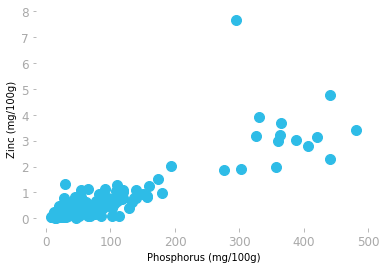

In [17]:
plt.scatter(data["Phosphorus (mg/100g)"], data["Zinc (mg/100g)"])
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()


<img src="images/blank.png" id="fig:ch09_output_zinc_phosphorus" alt="Figure 156: Amount of zinc as a function of the amount of phosphorus." />
Figure 156: Amount of zinc as a function of the amount of phosphorus.

You can then create the matrix and vectors corresponding to the equation
$\mA \vx = \vb$ (the function `to_numpy()` allows you to convert Pandas
Series to Numpy arrays):

In [18]:
x = data["Phosphorus (mg/100g)"].to_numpy()
b = data["Zinc (mg/100g)"].to_numpy()

A = np.array([x, np.ones(x.shape[0])]).T
A

array([[44.4,  1. ],
       [10. ,  1. ],
       [32.7,  1. ],
       ...,
       [ 9.8,  1. ],
       [15.8,  1. ],
       [32.6,  1. ]])

Now, use the normal equation to calculate $\hat{x}$:

In [19]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
x_hat

array([ 0.0084948 , -0.05865873])

You can check that it works by plotting the regression line:

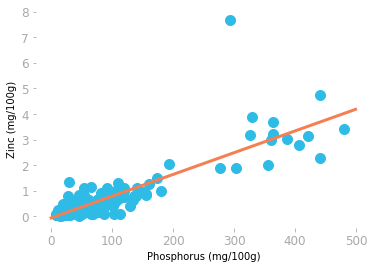

In [20]:
x_axis = np.arange(0, 500)
y_line = x_hat[0] * x_axis + x_hat[1]

plt.scatter(data["Phosphorus (mg/100g)"].to_numpy(), data["Zinc (mg/100g)"].to_numpy())
plt.plot(y_line, c="#F57F53")
# [...] Add labels

plt.xlabel("Phosphorus (mg/100g)")
plt.ylabel("Zinc (mg/100g)")
plt.show()


<img src="images/blank.png" id="fig:ch09_regression_line_zinc_phosphorus" alt="Figure 157: Regression line representing the relationship between amount of zinc and phosphorus." />
Figure 157: Regression line representing the relationship between amount of zinc and phosphorus.

You can see in Figure [157](#fig:ch09_regression_line_zinc_phosphorus)
that the line fits the data well.

### 8.4.3 Bonus: Relationship Between Least Squares and the Normal Equation

Why does the normal equation corresponds to the best solution of least
squares approximation? The goal of the least squares method is to
minimize the squared errors (the differences between the estimations
given by the regression line and the true values). You saw that the
matrix form of this problem is $\mA \vx = \vb$, so you want to minimize
the squared difference between $\mA \vx$ and $\vb$. Mathematically, you
can write:

$$
\arg\!\min((\mA \vx - \vb)^2)
$$

Remember that the sum of the squared $L^2$ norm of a vector $\vx$ can be
calculated with $\vx^{\text{T}} \vx$ (see
Section 5.4), so you have:

$$
(\mA \vx - \vb)^2 = (\mA \vx - \vb)^\text{T}(\mA \vx - \vb)
$$

You can consider this expression as a function of $\vx$, since you want
to find the values of $\vx$ that minimize it. As you saw in
Section 1.3, you can minimize a
function by finding the point where the derivative is equal to zero:

$$
\frac{d}{dx}(\mA \vx - \vb)^\text{T}(\mA \vx - \vb) = 0
$$

Let’s start by developing what is inside the derivative. Using what you
learned about the transposition properties in
Section 6.2.2.3 and
Section 6.3.3, you can
start with the following arrangement:

$$
(\mA \vx - \vb)^\text{T} = (\mA \vx)^\text{T} - \vb^\text{T} = \vx^\text{T} \mA^\text{T} - \vb^\text{T}
$$

So you have:

$$
\begin{aligned}
\frac{d}{dx}(\mA \vx - \vb)^\text{T}(\mA \vx - \vb) &= 0 \\\\
\frac{d}{dx}(\vx^\text{T} \mA^\text{T} - \vb^\text{T})(\mA \vx - \vb) &= 0 \\\\
\end{aligned}
$$

Then, you can develop as follows:

$$
(\vx^\text{T} \mA^\text{T} - \vb^\text{T})(\mA \vx - \vb)
= \vx^\text{T} \mA^\text{T} \mA \vx - \vx^\text{T} \mA^\text{T} \vb - \vb^\text{T}\mA \vx + \vb^\text{T}\vb
$$

Since you’ll differentiate with respect to $\vx$, you can remove the
terms that don’t contain any $\vx$:

$$
\vx^\text{T} \mA^\text{T} \mA \vx - \vx^\text{T} \mA^\text{T} \vb - \vb^\text{T}\mA \vx
$$

Now, look at the shape of $\vb^\text{T}\mA \vx$. The vector $\vb$ is
$(m, 1)$, so $\vb^{\text{T}}$ is $(1, m)$. The matrix $\mA$ is $(m, n)$
and the vector $\vx$ is $(n, 1)$. So, the shape $\vb^\text{T}\mA \vx$
is:

$$
\begin{aligned}
(1, m)(m, n)(n, 1) \\\\
(1, n)(n, 1) \\\\
(1, 1)
\end{aligned}
$$

This means that the shape of $\vb^\text{T}\mA \vx$ is 1: it is a scalar.
You can use the fact that a scalar is equal to its transpose:

$$
\vb^\text{T}\mA \vx = (\vb^\text{T}\mA \vx)^{\text{T}}
$$

As you saw in
Section 6.3.3, the
transposition of matrix product is defined as:

$$
(\mA\mB\mC)^{\text{T}} = \mC^{\text{T}}(\mA\mB)^{\text{T}} = \mC^{\text{T}}\mB^{\text{T}}\mA^{\text{T}}
$$

So you have:

$$
\vb^\text{T}\mA \vx = (\vb^\text{T}\mA \vx)^{\text{T}} = \vx^{\text{T}} \mA^{\text{T}} \vb
$$

Replacing into the expression you want to minimize:

$$
\begin{aligned}
&\vx^\text{T} \mA^\text{T} \mA \vx - \vx^\text{T} \mA^\text{T} \vb - \vb^\text{T}\mA \vx \\\\
&= \vx^\text{T} \mA^\text{T} \mA \vx - \vx^\text{T} \mA^\text{T} \vb - \vx^\text{T} \mA^\text{T} \vb \\\\
&= \vx^\text{T} \mA^\text{T} \mA \vx - 2 \vx^\text{T} \mA^\text{T} \vb
\end{aligned}
$$

We’ll not detail the differentiation of this expression (you can find
more details here:
https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/.)
. It results in:

$$
\frac{d}{dx} \vx^\text{T} \mA^\text{T} \mA \vx - 2 \vx^\text{T} \mA^\text{T} \vb = 2 \mA^\text{T} \mA \vx - 2 \mA^\text{T} \vb
$$

Here it is. You want to set this expression to zero to minimize the
error:

$$
\begin{aligned}
2 \mA^\text{T} \mA \vx - 2 \mA^\text{T} \vb &= 0 \\\\
2 \mA^\text{T} \mA \vx &= 2 \mA^\text{T} \vb \\\\
\mA^\text{T} \mA \vx &= \mA^\text{T} \vb 
\end{aligned}
$$

This is the normal equation. You can interpret the best approximation
obtained with this formula as a projection of the target vector into the
column space of $\mA$, or as a minimization of the distance between the
solution and the approximation.